In [1]:
import sys
print(f"=== Python version ===\n{sys.version}\n")

import numpy as np
import scipy as sp
import scipy.sparse
import pandas as pd

print(f"- Numpy version: {np.__version__}")
print(f"- Scipy version: {sp.__version__}")
print(f"- Pandas version: {pd.__version__}")

=== Python version ===
3.6.8 (default, Aug  7 2019, 17:28:10) 
[GCC 4.8.5 20150623 (Red Hat 4.8.5-39)]

- Numpy version: 1.19.5
- Scipy version: 1.5.1
- Pandas version: 1.0.5


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

from nb11utils import get_data_path

In [3]:
df = pd.read_csv(get_data_path('breast-cancer-wisconsin.data'),
                 header=None,names=['id', 'thickness','size_unif','shape_unif','adhesion',
                                    'cell_size','nuclei','chromatin','nucleoli',
                                    'mitoses','class'])

# Make some copies of the original dataframe, for later use
df_orig = df.copy()
df_orig2 = df.copy()

print(df[df['nuclei'] == '?'])
df.info()


          id  thickness  size_unif  shape_unif  adhesion  cell_size nuclei  \
23   1057013          8          4           5         1          2      ?   
40   1096800          6          6           6         9          6      ?   
139  1183246          1          1           1         1          1      ?   
145  1184840          1          1           3         1          2      ?   
158  1193683          1          1           2         1          3      ?   
164  1197510          5          1           1         1          2      ?   
235  1241232          3          1           4         1          2      ?   
249   169356          3          1           1         1          2      ?   
275   432809          3          1           3         1          2      ?   
292   563649          8          8           8         1          2      ?   
294   606140          1          1           1         1          2      ?   
297    61634          5          4           3         1        

In [4]:
# First attempt ... drop the rows that contain missing data
df_drop_rows = df[df['nuclei'] != '?']
df_drop_rows['nuclei'] = pd.to_numeric(df_drop_rows['nuclei'])
df_drop_rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   id          683 non-null    int64
 1   thickness   683 non-null    int64
 2   size_unif   683 non-null    int64
 3   shape_unif  683 non-null    int64
 4   adhesion    683 non-null    int64
 5   cell_size   683 non-null    int64
 6   nuclei      683 non-null    int64
 7   chromatin   683 non-null    int64
 8   nucleoli    683 non-null    int64
 9   mitoses     683 non-null    int64
 10  class       683 non-null    int64
dtypes: int64(11)
memory usage: 64.0 KB


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
# Now, perform a SVM fit to this data (with missing data rows removed)
#
# We will use all other columns to predict the 'class' column

In [6]:
from sklearn import svm

split = 525

y = df_drop_rows['class'].to_numpy()
X = df_drop_rows[['id', 'thickness','size_unif','shape_unif','adhesion','cell_size','nuclei','chromatin','nucleoli','mitoses']].to_numpy()

y_train = y[0:split]
y_test = y[split+1:]

X_train = X[0:split]
X_test = X[split+1:]

clf = svm.SVC(gamma='auto')
clf.fit(X_train, y_train)

ypred = clf.predict(X_test)
print(ypred-y_test)
diff = ypred-y_test

sum = 0
den = 0

for elem in diff:
    if elem==0:
        sum += 1
    den +=1
    
print()
print ("correct = %0.1f percent"  % (100.0*sum/den))

[ 0  0  0  0  0 -2  0  0 -2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 -2  0  0 -2 -2 -2 -2  0  0 -2  0  0  0  0  0  0 -2 -2  0  0  0 -2  0 -2
  0 -2 -2 -2  0 -2  0  0  0  0  0  0  0  0 -2 -2 -2  0  0 -2  0 -2 -2 -2
  0  0  0  0  0  0  0  0  0  0  0  0 -2  0  0  0  0  0  0 -2  0  0 -2  0
  0  0  0  0  0  0  0  0  0  0 -2  0  0  0  0  0  0  0  0  0 -2  0  0  0
  0  0  0  0  0  0 -2 -2 -2  0  0  0  0  0  0  0  0  0 -2 -2  0  0  0  0
  0  0  0  0  0 -2  0  0  0  0 -2 -2 -2]

correct = 76.4 percent


In [7]:
# Second attempt ... ignore the 'nuclei column', but keep all of the original rows
#
# Taking this approach appears to slightly improve things (76.4% -> 78.0%)

from sklearn import svm

split = 525

y = df['class'].to_numpy()
X = df[['id', 'thickness','size_unif','shape_unif','adhesion','cell_size','chromatin','nucleoli','mitoses']].to_numpy()

y_train = y[0:split]
y_test = y[split+1:]

X_train = X[0:split]
X_test = X[split+1:]

clf = svm.SVC(gamma='auto')
clf.fit(X_train, y_train)

ypred = clf.predict(X_test)
print(ypred-y_test)
diff = ypred-y_test

sum = 0
den = 0

for elem in diff:
    if elem==0:
        sum += 1
    den +=1
    
print()
print ("correct = %0.1f percent"  % (100.0*sum/den))

[ 0  0  0  0 -2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -2  0  0 -2
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -2  0  0 -2 -2 -2 -2  0  0
 -2  0  0  0  0  0  0 -2 -2  0  0  0 -2  0 -2  0 -2 -2 -2  0 -2  0  0  0
  0  0  0  0  0 -2 -2 -2  0  0 -2  0 -2 -2 -2  0  0  0  0  0  0  0  0  0
  0  0  0  0 -2  0  0  0  0  0  0 -2  0  0 -2  0  0  0  0  0  0  0  0  0
  0  0 -2  0  0  0  0  0  0  0  0  0 -2  0  0  0  0  0  0  0  0  0 -2 -2
 -2  0  0  0  0  0  0  0  0  0 -2 -2  0  0  0  0  0  0  0  0  0 -2  0  0
  0  0 -2 -2 -2]

correct = 78.0 percent


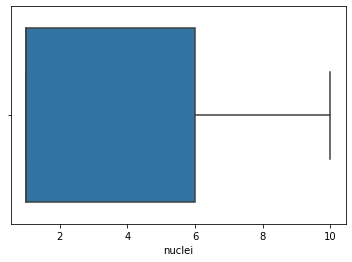

In [8]:
# The above two approaches serve as a sort of "baseline" for additional attempts.  In all that follows, we
# will try to replace the missing data with some sort of decent set of values for the nuclei column.

# Third attempt:  replace the missing nuclei data with either the mode or the mean of the remainder of the
# data in that column.

import seaborn as sns
#
# Box plot
#
sns.boxplot(df_drop_rows['nuclei'])


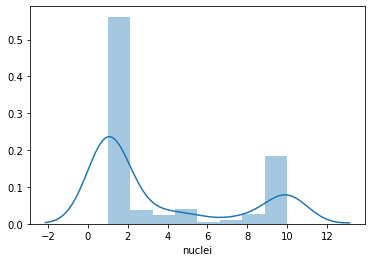

In [9]:
#
# Distribution plot
#
sns.distplot(df_drop_rows['nuclei'])

In [10]:
# It appears, due to the very non-normal distribution of the nuclei data, that replacing with the mode
# makes the most sense.  But, I have included the possiblity here to choose both options.  choice=1 will
# replace with the mode, and choice=2 will replace with the mean.

print(df_orig[df_orig['nuclei'] == '?'])
print (len(df_orig))

choice = 1

if choice == 1:
    mode = df_drop_rows['nuclei'].mode()[0]
    print ("Mode = ",mode)

    df_orig['nuclei'].replace({'?': int(mode)}, inplace=True)
    df_orig['nuclei'] = pd.to_numeric(df_orig['nuclei'])

if choice == 2:
    mean = df_drop_rows['nuclei'].mean()
    print ("mean = ",mean)

    df_orig['nuclei'].replace({'?': int(mean)}, inplace=True)
    df_orig['nuclei'] = pd.to_numeric(df_orig['nuclei'])

# just check to make sure that worked ... if it did, then len(df) = 699, and the first print
# statement should be empty.

print(df_orig[df_orig['nuclei'] == '?'])
print (len(df_orig))

          id  thickness  size_unif  shape_unif  adhesion  cell_size nuclei  \
23   1057013          8          4           5         1          2      ?   
40   1096800          6          6           6         9          6      ?   
139  1183246          1          1           1         1          1      ?   
145  1184840          1          1           3         1          2      ?   
158  1193683          1          1           2         1          3      ?   
164  1197510          5          1           1         1          2      ?   
235  1241232          3          1           4         1          2      ?   
249   169356          3          1           1         1          2      ?   
275   432809          3          1           3         1          2      ?   
292   563649          8          8           8         1          2      ?   
294   606140          1          1           1         1          2      ?   
297    61634          5          4           3         1        

/usr/local/lib64/python3.6/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [11]:
# Third attempt:  we have replaced the missing data with the mode
#
# Result:  we get 78.0% correct.  So, the same results as just eliminating the column entirely.


In [12]:
from sklearn import svm

split = 525

y = df_orig['class'].to_numpy()
X = df_orig[['id', 'thickness','size_unif','shape_unif','adhesion','cell_size','nuclei','chromatin','nucleoli','mitoses']].to_numpy()

y_train = y[0:split]
y_test = y[split+1:]

X_train = X[0:split]
X_test = X[split+1:]

clf = svm.SVC()
clf.fit(X_train, y_train)

ypred = clf.predict(X_test)
print(ypred-y_test)
diff = ypred-y_test

sum = 0
den = 0

for elem in diff:
    if elem==0:
        sum += 1
    den +=1
    
print()
print ("correct = %0.1f percent"  % (100.0*sum/den))

[ 0  0  0  0 -2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -2  0  0 -2
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -2  0  0 -2 -2 -2 -2  0  0
 -2  0  0  0  0  0  0 -2 -2  0  0  0 -2  0 -2  0 -2 -2 -2  0 -2  0  0  0
  0  0  0  0  0 -2 -2 -2  0  0 -2  0 -2 -2 -2  0  0  0  0  0  0  0  0  0
  0  0  0  0 -2  0  0  0  0  0  0 -2  0  0 -2  0  0  0  0  0  0  0  0  0
  0  0 -2  0  0  0  0  0  0  0  0  0 -2  0  0  0  0  0  0  0  0  0 -2 -2
 -2  0  0  0  0  0  0  0  0  0 -2 -2  0  0  0  0  0  0  0  0  0 -2  0  0
  0  0 -2 -2 -2]

correct = 78.0 percent


/usr/local/lib64/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [13]:
# Fourth attempt:  replace the missing data with a 'regression' analysis result.  We will use the data
# with missing rows removed, and then predict what the values should be for the nuclei column, using
# a SWM fit based on the other 9 columns.
#
# Results:  We find that when we use the 683 rows with good data to predict the values of nuclei for
# the missing rows, the SVM predicts that nuclei=1 for all 16 of these rows.  This is the exact same
# result as we had for imputing with the mode.  So, there is no difference between imputing with mode
# and imputing with regression, for this data set.

In [14]:
# Should have 683 entries in df_drop_rows
df_drop_rows = df_orig2[df_orig2['nuclei'] != '?']
df_drop_rows['nuclei'] = pd.to_numeric(df_drop_rows['nuclei'])
df_drop_rows.info()

# Should have 16 entries in df_missing_rows
df_missing_rows = df_orig2[df_orig2['nuclei'] == '?']
df_missing_rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   id          683 non-null    int64
 1   thickness   683 non-null    int64
 2   size_unif   683 non-null    int64
 3   shape_unif  683 non-null    int64
 4   adhesion    683 non-null    int64
 5   cell_size   683 non-null    int64
 6   nuclei      683 non-null    int64
 7   chromatin   683 non-null    int64
 8   nucleoli    683 non-null    int64
 9   mitoses     683 non-null    int64
 10  class       683 non-null    int64
dtypes: int64(11)
memory usage: 64.0 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 23 to 617
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          16 non-null     int64 
 1   thickness   16 non-null     int64 
 2   size_unif   16 non-null     int64 
 3   shape_unif  16 non-null     int64 
 4 

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
from sklearn import svm

split = 525

# First, fit nuclei with the other 9 columns, using df_drop_rows as the source
y = df_drop_rows['nuclei'].to_numpy()
X = df_drop_rows[['id', 'thickness','size_unif','shape_unif','adhesion','cell_size','chromatin','nucleoli','mitoses']].to_numpy()

clf = svm.SVC()
clf.fit(X, y)

# Next, prefict the values of nuclei for the missing rows.
X_test = df_missing_rows[['id', 'thickness','size_unif','shape_unif','adhesion','cell_size','chromatin','nucleoli','mitoses']].to_numpy()

ypred = clf.predict(X_test)

print (ypred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


/usr/local/lib64/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [16]:
# There is really no need to do this analysis, but for completeness, we will now construct a full 699 entry
# dataframe which includes this new prediction, and then do an SVM fit to this new dataframe.
#
# To be clear, the ORDER of this new concatenated dataframe is not the same as the original ... I have just
# inserted the new replaced rows into the dataframe that had them removed at the beginning, to force them
# to be included in the training data.  So, when we split into training and
# test data, we might exactly the same mix. But, it seems like it does not make any difference, as we still
# get 78.0% correct.

df_missing_rows['nuclei'] = ypred

frames = [df_missing_rows, df_drop_rows]

df_SVM_regression = pd.concat(frames)
df_SVM_regression.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 23 to 698
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   id          699 non-null    int64
 1   thickness   699 non-null    int64
 2   size_unif   699 non-null    int64
 3   shape_unif  699 non-null    int64
 4   adhesion    699 non-null    int64
 5   cell_size   699 non-null    int64
 6   nuclei      699 non-null    int64
 7   chromatin   699 non-null    int64
 8   nucleoli    699 non-null    int64
 9   mitoses     699 non-null    int64
 10  class       699 non-null    int64
dtypes: int64(11)
memory usage: 65.5 KB


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [17]:
from sklearn import svm

split = 525

y = df_SVM_regression['class'].to_numpy()
X = df_SVM_regression[['id', 'thickness','size_unif','shape_unif','adhesion','cell_size','nuclei','chromatin','nucleoli','mitoses']].to_numpy()

y_train = y[0:split]
y_test = y[split+1:]

X_train = X[0:split]
X_test = X[split+1:]

clf = svm.SVC()
clf.fit(X_train, y_train)

ypred = clf.predict(X_test)
print(ypred-y_test)
diff = ypred-y_test

sum = 0
den = 0

for elem in diff:
    if elem==0:
        sum += 1
    den +=1
    
print()
print ("correct = %0.1f percent"  % (100.0*sum/den))

[ 0  0  0  0  0 -2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -2  0  0
 -2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -2  0  0 -2 -2 -2 -2  0
  0 -2  0  0  0  0  0  0 -2 -2  0  0  0 -2  0 -2  0 -2 -2 -2  0 -2  0  0
  0  0  0  0  0  0 -2 -2 -2  0  0 -2  0 -2 -2 -2  0  0  0  0  0  0  0  0
  0  0  0  0 -2  0  0  0  0  0  0 -2  0  0 -2  0  0  0  0  0  0  0  0  0
  0  0 -2  0  0  0  0  0  0  0  0  0 -2  0  0  0  0  0  0  0  0  0 -2 -2
 -2  0  0  0  0  0  0  0  0  0 -2 -2  0  0  0  0  0  0  0  0  0 -2  0  0
  0  0 -2 -2 -2]

correct = 78.0 percent


/usr/local/lib64/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [18]:
# Fifth attempt:  regression + perturbation
#
# We have 16 rows with missing data.  Our first imputation strategy was to replace the nuclei column with the
# mode, and the second imputation strategy was to replace by regresssion, which as we saw made no difference
# because the regression values were the same as the mode.
#
# Now, finally, we can try replacing with different values other than just the mode/regression values of 1 for
# all 16 rows.
#
# Looking at the distribution of nuclei values in the distribution plot above, we see that some of the time,
# maybe it should be a 9 rather than a 1.  Let's randomly choose 5 values to set to 9, out of the sixteen.
# since we are not using the other column values to base this decision upon, we really can choose any of the 16
# to set to 9.
#
# Result:  we still get 78.0%
#
# I think that really the main conclusion to draw from all of this is that the value of nuclei just does not
# matter that much in this data.  We saw that when above, we just removed the entire column and did not even
# consider it, and got 78.0%!!!

ypred = np.array([9,9,9,9,9,1,1,1,1,1,1,1,1,1,1,1])

df_missing_rows['nuclei'] = ypred

frames = [df_missing_rows,df_drop_rows]

df_SVM_regression_perturbation = pd.concat(frames)
df_SVM_regression_perturbation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 23 to 698
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   id          699 non-null    int64
 1   thickness   699 non-null    int64
 2   size_unif   699 non-null    int64
 3   shape_unif  699 non-null    int64
 4   adhesion    699 non-null    int64
 5   cell_size   699 non-null    int64
 6   nuclei      699 non-null    int64
 7   chromatin   699 non-null    int64
 8   nucleoli    699 non-null    int64
 9   mitoses     699 non-null    int64
 10  class       699 non-null    int64
dtypes: int64(11)
memory usage: 65.5 KB


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [19]:
from sklearn import svm

split = 525

y = df_SVM_regression_perturbation['class'].to_numpy()
X = df_SVM_regression_perturbation[['id', 'thickness','size_unif','shape_unif','adhesion','cell_size','nuclei','chromatin','nucleoli','mitoses']].to_numpy()

y_train = y[0:split]
y_test = y[split+1:]

X_train = X[0:split]
X_test = X[split+1:]

clf = svm.SVC()
clf.fit(X_train, y_train)

ypred = clf.predict(X_test)
print(ypred-y_test)
diff = ypred-y_test

sum = 0
den = 0

for elem in diff:
    if elem==0:
        sum += 1
    den +=1
    
print()
print ("correct = %0.1f percent"  % (100.0*sum/den))

[ 0  0  0  0  0 -2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -2  0  0
 -2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -2  0  0 -2 -2 -2 -2  0
  0 -2  0  0  0  0  0  0 -2 -2  0  0  0 -2  0 -2  0 -2 -2 -2  0 -2  0  0
  0  0  0  0  0  0 -2 -2 -2  0  0 -2  0 -2 -2 -2  0  0  0  0  0  0  0  0
  0  0  0  0 -2  0  0  0  0  0  0 -2  0  0 -2  0  0  0  0  0  0  0  0  0
  0  0 -2  0  0  0  0  0  0  0  0  0 -2  0  0  0  0  0  0  0  0  0 -2 -2
 -2  0  0  0  0  0  0  0  0  0 -2 -2  0  0  0  0  0  0  0  0  0 -2  0  0
  0  0 -2 -2 -2]

correct = 78.0 percent


/usr/local/lib64/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
